# Fetching Key MF values - object oriented

In [1]:
import matplotlib.pyplot as plt

### Generating toy data

In [2]:
from mfanalysis.generate_data import generate_fbm_path

In [3]:
X = generate_fbm_path(4096, 0.8)[:, 0]

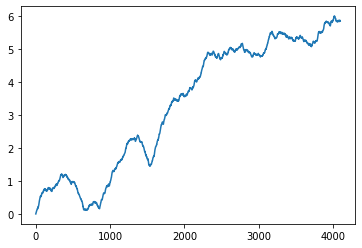

In [4]:
plt.plot(X)
plt.show()

In [5]:
from mfanalysis.signal import Signal

In [6]:
S = Signal(X, fs=1)

#### Multifractal analysis

In [7]:
import numpy as np

In [8]:
S.mf_analysis_full(
    j1=2, j2=8,
    q=np.arange(-2,3),
    n_cumul=2,
    p_exp=2
)

MFractalData(structure=<mfanalysis.structurefunction.StructureFunction object at 0x7f299aed7f10>, cumulants=<mfanalysis.cumulants.Cumulants object at 0x7f2971616150>, spectrum=<mfanalysis.mfspectrum.MultifractalSpectrum object at 0x7f296c22e650>)

#### Getting variables

In [9]:
sf = S.multi_fractal.structure
cumul = S.multi_fractal.cumulants
mfs = S.multi_fractal.spectrum

or all at once

In [10]:
sf, cumul, mfs = S.multi_fractal

$\zeta(q)$

In [11]:
zeta = sf.zeta

In [12]:
zeta

array([-1.63517637, -0.80525854,  0.        ,  0.78591289,  1.55490007])

In [13]:
q = 2

zeta[sf.q == q]

array([1.55490007])

$c_p$

In [14]:
c_p = cumul.log_cumulants

In [15]:
c_p

array([ 0.79496978, -0.01909978])

In [16]:
p = 1

c_p[cumul.m == p][0]

0.7949697834697765

$\log_2 S(j, q)$

In [17]:
logSjq = sf.logvalues

In [18]:
logSjq

array([[ 17.54218061,  15.15492728,  13.51566537,  11.77819012,
         10.15606871,   8.51859187,   7.50156802,   5.63477306,
          3.71805341],
       [  8.48455009,   7.48458803,   6.69588331,   5.81947134,
          5.03450795,   4.20580608,   3.70465204,   2.79190385,
          1.7424246 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [ -8.10740833,  -7.31704957,  -6.57356945,  -5.68874473,
         -4.94404971,  -4.10120624,  -3.60934765,  -2.73162936,
         -1.46411626],
       [-15.94704114, -14.47811742, -13.02694119, -11.25887671,
         -9.79760981,  -8.10031668,  -7.12341464,  -5.39617823,
         -2.69502832]])

In [19]:
q = 2

logSjq[sf.q == q, :]

array([[-15.94704114, -14.47811742, -13.02694119, -11.25887671,
         -9.79760981,  -8.10031668,  -7.12341464,  -5.39617823,
         -2.69502832]])

In [20]:
j = 5

logSjq[:, sf.j == j]

array([[10.15606871],
       [ 5.03450795],
       [ 0.        ],
       [-4.94404971],
       [-9.79760981]])

In [21]:
j = 5
q = 2

logSjq[sf.q == q, sf.j == j]

array([-9.79760981])

$C_p(j)$

In [22]:
c = cumul.values

In [23]:
c

array([[-5.73389435, -5.12819074, -4.59863093, -3.98716802, -3.45853848,
        -2.87870796, -2.53503954, -1.91529228, -1.11130238],
       [ 0.25666259,  0.11573378,  0.08480186,  0.09081965,  0.06290369,
         0.07250071,  0.0662391 ,  0.04192432,  0.19919012]])

In [24]:
p = 1
j = 5

c[cumul.m == p, cumul.j == j]

array([-3.45853848])

$D(h)$

In [25]:
D = mfs.Dq
h = mfs.hq

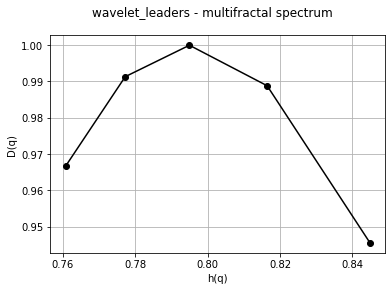

In [26]:
mfs.plot()

In [27]:
q = 2

h[mfs.q == q], D[mfs.q == q]

(array([0.76078919]), array([0.96667831]))

In [ ]:
S.mf_analysis()

In [28]:
S.mf_analysis_full(
    j1=2, j2=8,
    q=np.arange(-2,3),
    n_cumul=2,
    p_exp=2
)

UnboundLocalError: local variable 'multi_fractal' referenced before assignment